In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

In [3]:
DATASET_PATH = 'train.csv'
PREPARED_DATASET_PATH = 'train_pr.csv'
DATASET_TEST_PATH = 'test.csv'

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv(DATASET_PATH)
df_t = pd.read_csv(DATASET_TEST_PATH)

Функция отрисовки графика и вывода r2_score

In [6]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10)) 
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

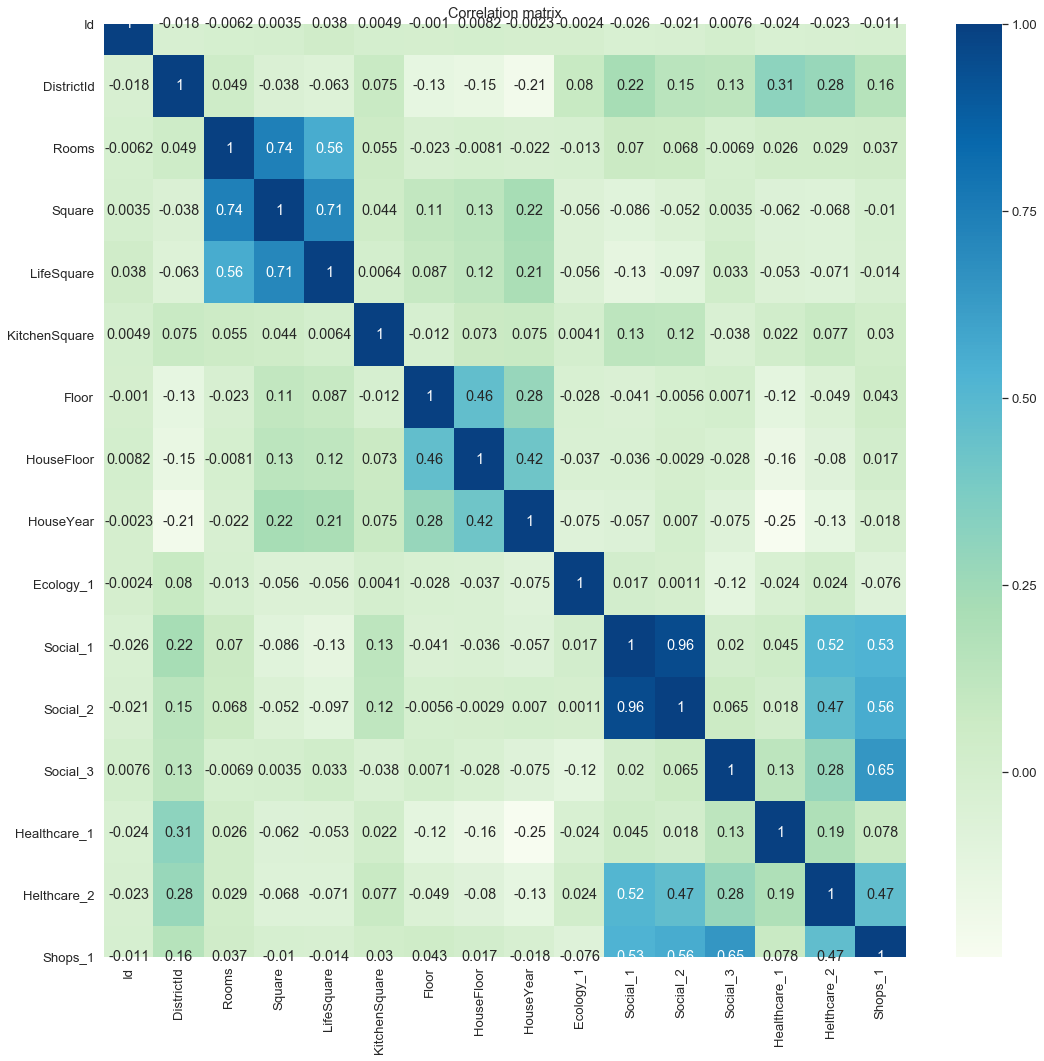

In [11]:
plt.figure(figsize=(16,16))

sns.set(font_scale=1.2)
sns.heatmap(df_t.corr(),cmap='GnBu',annot=True)

plt.title('Correlation matrix')
plt.show()

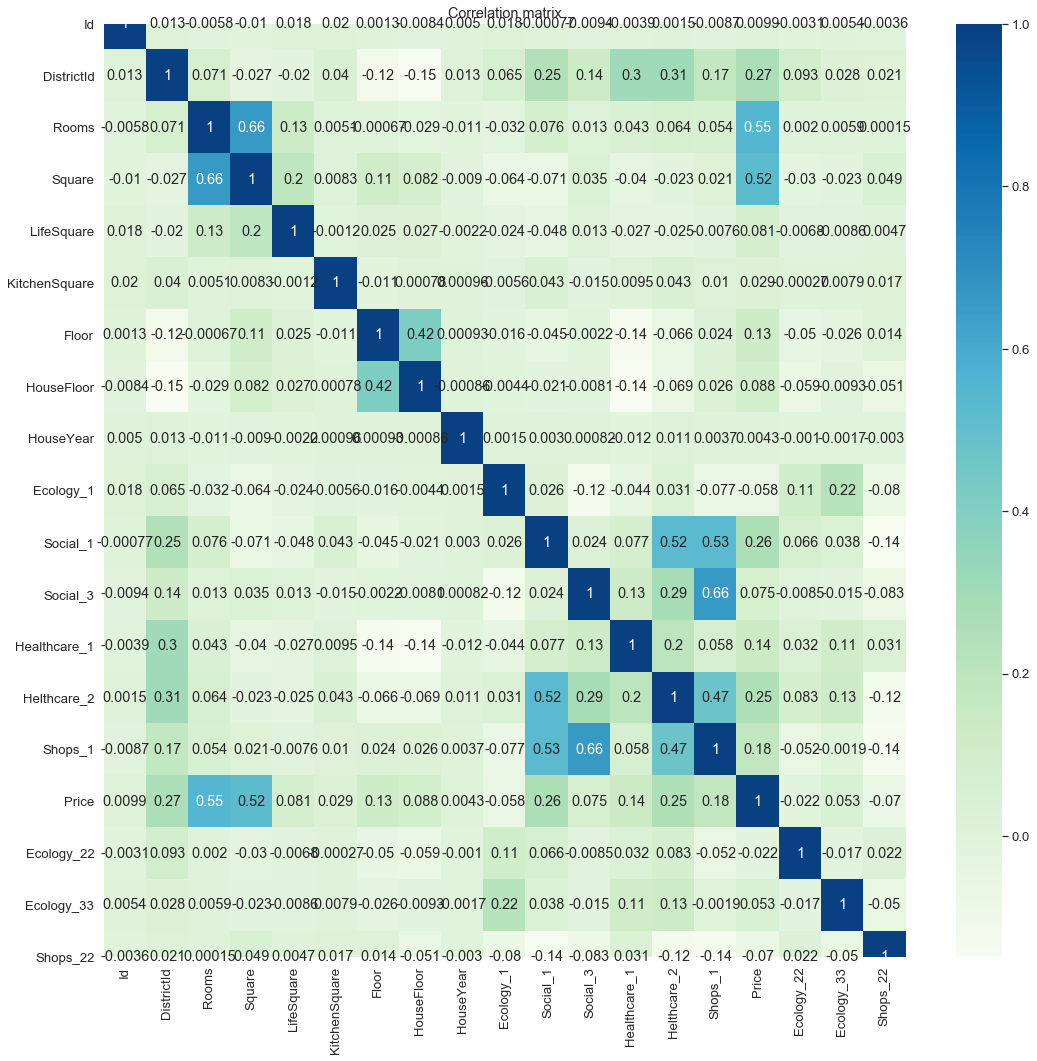

In [88]:
plt.figure(figsize=(16,16))

sns.set(font_scale=1.2)
sns.heatmap(df.corr(),cmap='GnBu',annot=True)

plt.title('Correlation matrix')
plt.show()

На основе кореляционной матрицы выкинул столбцы Social_1,LifeSquare.
Колонки Ecology_2, Ecology_3, Shops_2 изменил, сделал числовые поля A-1, B-0
Значения NaN в полях поменял на 0.

In [7]:
#df.to_csv(PREPARED_DATASET_PATH)
df_prep = pd.read_csv(PREPARED_DATASET_PATH)

In [8]:
df_prep

,Unnamed: 0,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,...,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_22,Ecology_33,Shops_22
0,0,0,0,0.0,0.000000,0.000000,0.0,0,0.0,0,...,0,0,0.0,0,0,0,0.000000,0,0,0
1,1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,...,46,1,240.0,1,16,B,300009.450063,0,0,0
2,2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,...,34,0,229.0,1,3,B,220925.908524,0,0,0
3,3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,...,23,3,1084.0,0,5,B,175616.227217,0,0,0
4,4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,...,35,1,2078.0,2,4,B,150226.531644,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,...,46,6,350.0,3,11,B,196684.316040,0,0,0
9996,9996,0,0,0.0,0.000000,0.000000,0.0,0,0.0,0,...,0,0,0.0,0,0,0,0.000000,0,0,0
9997,9997,0,0,0.0,0.000000,0.000000,0.0,0,0.0,0,...,0,0,0.0,0,0,0,0.000000,0,0,0
9998,9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,...,30,9,325.0,2,5,B,181595.339808,0,1,0


In [16]:
feature_names=['Id', 'DistrictId', 'Rooms', 'Square', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 
       'Ecology_22', 'Ecology_33', 'Shops_22']#'Shops_2',, 'LifeSquare'
target_name='Price'

In [17]:
x=df_prep[feature_names]
y=df_prep[target_name]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=5)

In [19]:
final_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=5)
final_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

R2:	0.97
MAE:	10560.298
MSE:	549210245.098


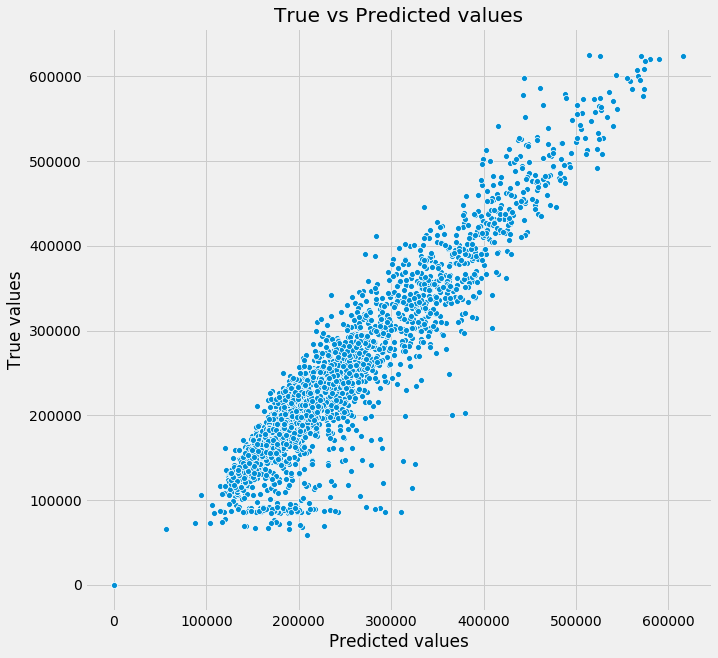

In [20]:
y_train_preds = final_model.predict(x_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.92
MAE:	15360.696
MSE:	1380191256.178


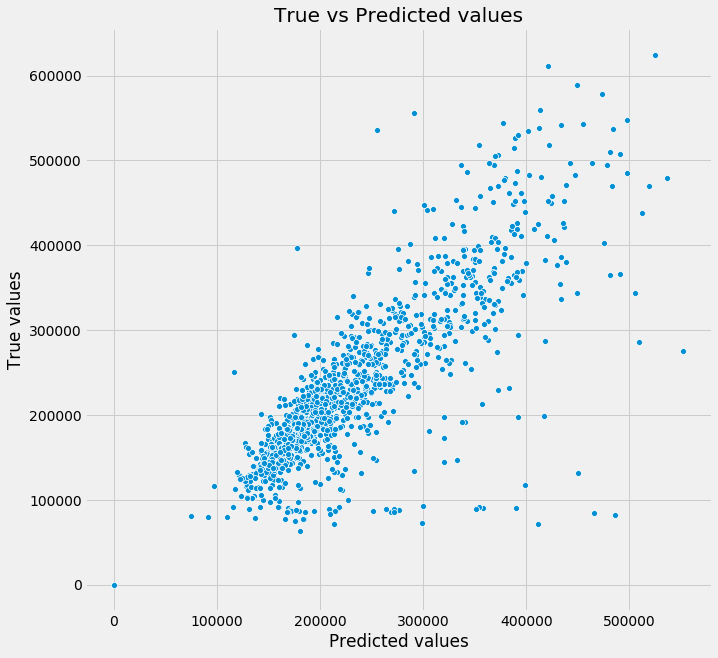

In [21]:
y_test_preds = final_model.predict(x_test)
evaluate_preds(y_test, y_test_preds)